## Dependencias

In [17]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

cf.go_offline()

## Datos sintéticos

In [47]:
x1  = np.random.normal(0,1,1000)
x2  = np.random.normal(6,10,1000)
x3  = np.random.normal(-3,100,1000)

In [51]:
y = 2*x1 + 3*x2 + 4*x3 + 5+np.random.normal(0,1,1000)

In [52]:
df = pd.DataFrame({'x1':x1,'x2':x2,'x3':x3,'y':y})

## Partición de datos

In [53]:
train,valid = train_test_split(df,test_size=0.3)
train.reset_index(drop=True,inplace=True)
valid.reset_index(drop=True,inplace=True)
train.shape,valid.shape


((700, 4), (300, 4))

## Aprendizaje

### Regresión Lineal

In [54]:
rl = LinearRegression()
hp = {'fit_intercept':[True,False]}
gs = GridSearchCV(rl,hp,cv=5,scoring='neg_mean_squared_error',n_jobs=-1,verbose=True)
gs.fit(train[['x1','x2','x3']],train['y'])
gs.best_params_,gs.best_score_
rl = gs.best_estimator_
rl.fit(train[['x1','x2','x3']],train['y'])
{'train':mean_absolute_percentage_error(train['y'],rl.predict(train[['x1','x2','x3']])),
 'valid':mean_absolute_percentage_error(valid['y'],rl.predict(valid[['x1','x2','x3']]))}

Fitting 5 folds for each of 2 candidates, totalling 10 fits


{'train': 0.018151907446865394, 'valid': 0.008465414993003026}

In [55]:
rl.coef_,rl.intercept_

(array([1.93547346, 2.99443832, 4.00019084]), 4.996073930615445)

<Axes: xlabel='y', ylabel='Density'>

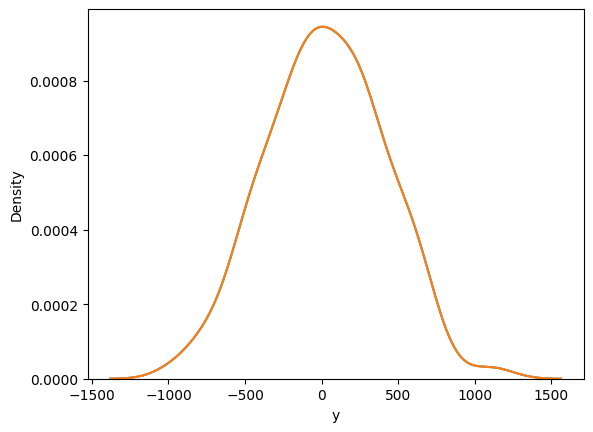

In [56]:
sns.kdeplot(valid['y'])
sns.kdeplot(rl.predict(valid[['x1','x2','x3']]))

### Regresión Ridge

In [57]:
rr = Ridge()
hp = {'alpha':np.logspace(-3,3,100),'fit_intercept':[True,False]}
gs = GridSearchCV(rr,hp,cv=5,scoring='neg_mean_squared_error',n_jobs=-1,verbose=True)
gs.fit(train[['x1','x2','x3']],train['y'])
gs.best_params_,gs.best_score_
rr = gs.best_estimator_
rr.fit(train[['x1','x2','x3']],train['y'])
{'train':mean_absolute_percentage_error(train['y'],rr.predict(train[['x1','x2','x3']])),
 'valid':mean_absolute_percentage_error(valid['y'],rr.predict(valid[['x1','x2','x3']]))}


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


{'train': 0.018161312852118923, 'valid': 0.008467024920504305}

In [58]:
rr.coef_,rr.intercept_

(array([1.9333173 , 2.99440828, 4.00018935]), 4.996291485838412)

<Axes: xlabel='y', ylabel='Density'>

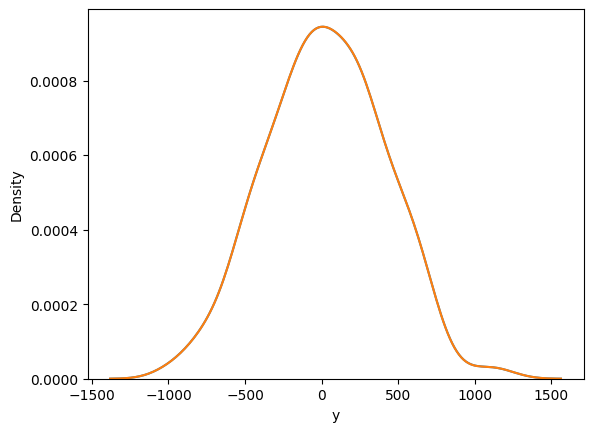

In [59]:
sns.kdeplot(valid['y'])
sns.kdeplot(rr.predict(valid[['x1','x2','x3']]))